# 目的
- チョコボール検出のモデルのテスト

In [4]:
import matplotlib.pyplot as plt

import os
import numpy as np

from chainercv.utils import read_image
from chainercv.visualizations import vis_bbox
from chainercv.links import FasterRCNNVGG16

In [2]:
def getClasses(classes_file):
    # カテゴリファイル
    classes = list()
    with open(classes_file) as fd:
        for one_line in fd.readlines():
            cl = one_line.split('\n')[0]
            classes.append(cl)
    return classes

In [6]:
HOME = '/home/tokita/workspace/etc/ToolSamples/chainer-CV'

In [7]:
data_dir = os.path.join(HOME, 'data/chocoball')

file_img_set = os.path.join(data_dir, 'images.npy')
file_bbox_set = os.path.join(data_dir, 'bounding_box_data.npy')
file_object_ids = os.path.join(data_dir, 'object_ids.npy')

file_classes = os.path.join(data_dir, 'classes.txt')

In [8]:
imgs = np.load(file_img_set)
bboxs = np.load(file_bbox_set)
objectIDs = np.load(file_object_ids)
classes = getClasses(file_classes)

In [9]:
pretrain_model = 'out/snapshot_model.npz' # 独自で学習させたモデル

model_frcnn = FasterRCNNVGG16(n_fg_class=len(classes),
                              pretrained_model=pretrain_model)

In [10]:
img = imgs[0]
print(img.shape)

(3, 302, 403)


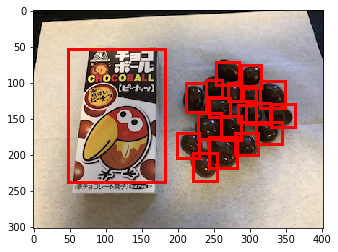

In [13]:
bboxes, labels, scores = model_frcnn.predict([img])
vis_bbox(img, bboxes[0], labels[0])
#vis_bbox(img, bboxes[0], labels[0], scores[0], label_names=classes)
plt.show()